# Traffic Sign Detection 

https://www.kaggle.com/datasets/pkdarabi/cardetection

In [1]:
import os 

root_dir = r"/kaggle/input/cardetection/car"

dir_train = os.path.join(root_dir, "train")
dir_test = os.path.join(root_dir, "test")
dir_valid = os.path.join(root_dir, "valid")

dir_train_img = os.path.join(dir_train, "images")
dir_train_lab = os.path.join(dir_train, "labels")

dir_test_img = os.path.join(dir_test, "images")
dir_test_lab = os.path.join(dir_test, "labels")

dir_valid_img = os.path.join(dir_valid, "images")
dir_valid_lab = os.path.join(dir_valid, "labels")

video_mp4 = r".\data\traffic_sign_detection\video.mp4"

classes_list = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 
                'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
                'Speed Limit 80', 'Speed Limit 90', 'Stop', 'No Traffic Sign']

classes_dict = {
    0: 'Green Light',
    1: 'Red Light',
    2: 'Speed Limit 10',
    3: 'Speed Limit 100',
    4: 'Speed Limit 110',
    5: 'Speed Limit 120',
    6: 'Speed Limit 20',
    7: 'Speed Limit 30',
    8: 'Speed Limit 40',
    9: 'Speed Limit 50',
    10: 'Speed Limit 60',
    11: 'Speed Limit 70',
    12: 'Speed Limit 80',
    13: 'Speed Limit 90',
    14: 'Stop', 
    15: 'No Traffic Sign'
}


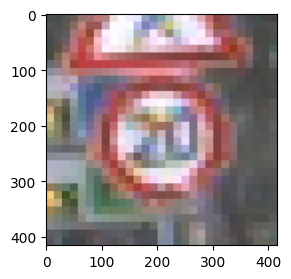

Class: 7 --> Speed Limit 30
Class: 6 --> Speed Limit 20


In [2]:
img_example = os.path.join(dir_train_img, "00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.jpg") 
label_example = os.path.join(dir_train_lab, "00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.txt") 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(3,3))
img = mpimg.imread(img_example)
imgplot = plt.imshow(img)
plt.show()

with open(label_example, 'r') as file:
    # Extract the first number from each line to identify class and convert it to the according sign 
    for line in file:
        sign_int = int(line.split(' ')[0])
        print(f"Class: {sign_int} --> {classes_dict[sign_int]}")


In [3]:
# print image as numpy array
print(img.shape)

(416, 416, 3)


In [4]:
from imageio.v2 import imread

a = imread(img_example)
a

array([[[74, 78, 81],
        [74, 78, 81],
        [74, 78, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[74, 78, 81],
        [74, 78, 81],
        [74, 78, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[74, 78, 81],
        [74, 78, 81],
        [74, 78, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[85, 85, 87],
        [85, 85, 87],
        [85, 85, 87],
        ...,
        [90, 97, 89],
        [90, 97, 89],
        [90, 97, 89]],

       [[85, 85, 87],
        [85, 85, 87],
        [85, 85, 87],
        ...,
        [90, 97, 89],
        [90, 97, 89],
        [90, 97, 89]],

       [[85, 85, 87],
        [85, 85, 87],
        [85, 85, 87],
        ...,
        [90, 97, 89],
        [90, 97, 89],
        [90, 97, 89]]], dtype=uint8)

# Load Data 

In [5]:
from ts_helper_functions import CustomImageDataset

import torch 
from torchvision import transforms

# Define the transformations for the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train datalaoder
batch = 32
train_custom_dataset = CustomImageDataset(dir_train, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

# test datalaoder
test_custom_dataset = CustomImageDataset(dir_test, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_custom_dataset, batch_size=batch, shuffle=True)

# valid datalaoder
valid_custom_dataset = CustomImageDataset(dir_valid, transform=transform)
valid_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

In [6]:
images, labels = next(iter(train_dataloader))
print(images[0], labels[0])

tensor([[[-0.4667, -0.4902, -0.5137,  ..., -0.3804, -0.4039, -0.4275],
         [-0.4510, -0.4667, -0.4902,  ..., -0.3725, -0.3725, -0.3725],
         [-0.4196, -0.4353, -0.4588,  ..., -0.3569, -0.3255, -0.3020],
         ...,
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

        [[-0.0824, -0.1059, -0.1294,  ...,  0.0039, -0.0196, -0.0431],
         [-0.0667, -0.0824, -0.1059,  ...,  0.0118,  0.0118,  0.0118],
         [-0.0353, -0.0510, -0.0745,  ...,  0.0275,  0.0588,  0.0824],
         ...,
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

        [[ 0.4353,  0.4118,  0.3882,  ...,  0.4667,  0.4431,  0.4196],
         [ 0.4510,  0.4353,  0.4118,  ...,  0

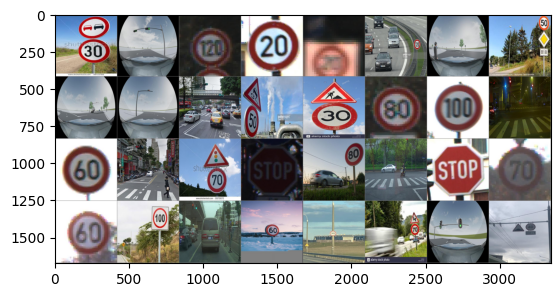

Speed Limit 30, Green Light, Speed Limit 120, Speed Limit 20, Speed Limit 20, Speed Limit 120, Speed Limit 70, Speed Limit 50, Speed Limit 60, Red Light, Green Light, Speed Limit 50, Speed Limit 30, Speed Limit 80, Speed Limit 100, Red Light, Speed Limit 60, Red Light, Speed Limit 70, Stop, Speed Limit 80, Red Light, Stop, Speed Limit 70, Speed Limit 60, Speed Limit 100, Green Light, Speed Limit 60, Speed Limit 90, Speed Limit 70, Green Light, Speed Limit 40


In [7]:
import torchvision
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# show images
imshow(torchvision.utils.make_grid(images))
print(', '.join(f'{classes_list[labels[j]]}' for j in range(batch)))

# Load and initialize Model

In [8]:
from ts_helper_functions import ts_net

# Model instantiation
net = ts_net()

In [9]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

# Train Model 

In [10]:
from ts_helper_functions  import train 

model_directory = r"/kaggle/working/"
epochs = 20
model_name = "ts_cnn"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

metrics_dict = train(net, train_dataloader, test_dataloader, epochs, optimizer, criterion, 
                     model_directory=r".\nn", model_name=full_model_name, save_every_epoch=False)

Epoch 1/20 Train Loss: 2.558060 Train Acc: 0.182720: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
Epoch 2/20 Train Loss: 1.960656 Train Acc: 0.351275: 100%|██████████| 111/111 [00:31<00:00,  3.51it/s]
Epoch 3/20 Train Loss: 1.683927 Train Acc: 0.436261: 100%|██████████| 111/111 [00:31<00:00,  3.54it/s]
Epoch 4/20 Train Loss: 1.483243 Train Acc: 0.507082: 100%|██████████| 111/111 [00:31<00:00,  3.57it/s]
Epoch 5/20 Train Loss: 1.308552 Train Acc: 0.566289: 100%|██████████| 111/111 [00:30<00:00,  3.61it/s]
Epoch 6/20 Train Loss: 1.136575 Train Acc: 0.629178: 100%|██████████| 111/111 [00:30<00:00,  3.60it/s]
Epoch 7/20 Train Loss: 0.945371 Train Acc: 0.696317: 100%|██████████| 111/111 [00:30<00:00,  3.61it/s]
Epoch 8/20 Train Loss: 0.742749 Train Acc: 0.755241: 100%|██████████| 111/111 [00:30<00:00,  3.59it/s]
Epoch 9/20 Train Loss: 0.610877 Train Acc: 0.803683: 100%|██████████| 111/111 [00:30<00:00,  3.66it/s]
Epoch 10/20 Train Loss: 0.436893 Train Acc: 0.855241: 100%|██████████| 11

Finished Training


# Evaluation

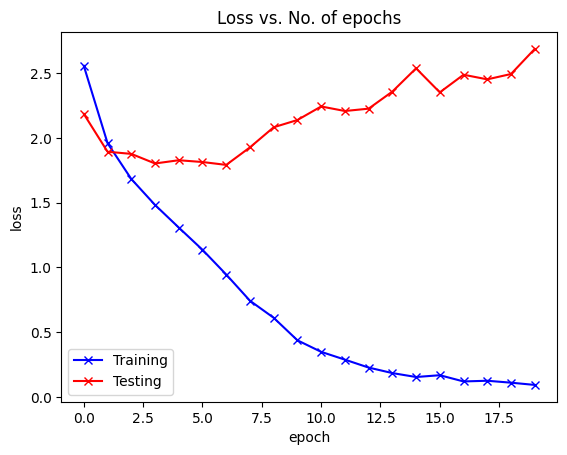

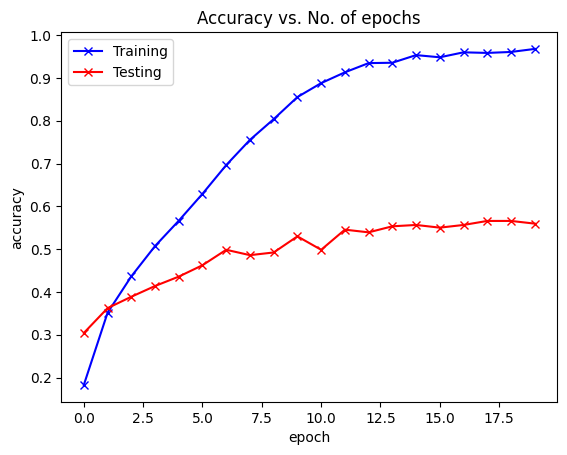

In [11]:
from ts_helper_functions import plot_accuracies, plot_losses

plot_losses(metrics_dict["train_losses"],metrics_dict["test_losses"])

plot_accuracies(metrics_dict["train_accuracies"],metrics_dict["test_accuracies"])

In [12]:
# Set device to CPU
net.to("cpu")

ts_net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (convs): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=163216, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=16, bias=True)
)

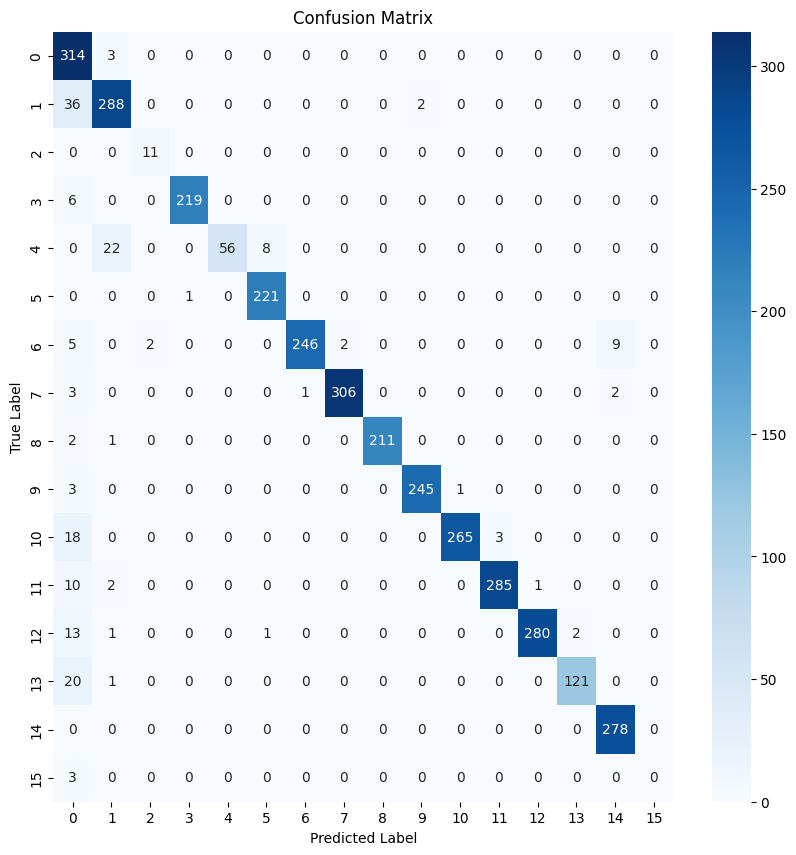

Accuracy:  0.9479
Precision: 0.9559
Recall:    0.9479
F1 Score:  0.9486


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from ts_helper_functions import evaluate_model_v2


accuracy, precision, recall, f1 = evaluate_model_v2(net, train_dataloader)

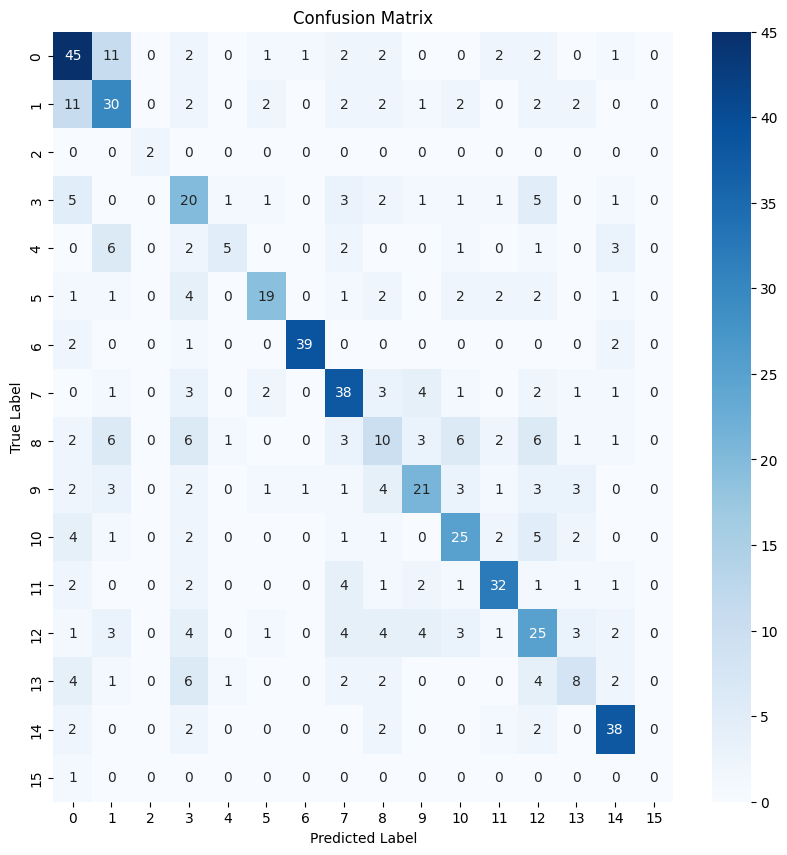

Accuracy:  0.5596
Precision: 0.5630
Recall:    0.5596
F1 Score:  0.5548


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
accuracy, precision, recall, f1 = evaluate_model_v2(net, test_dataloader)

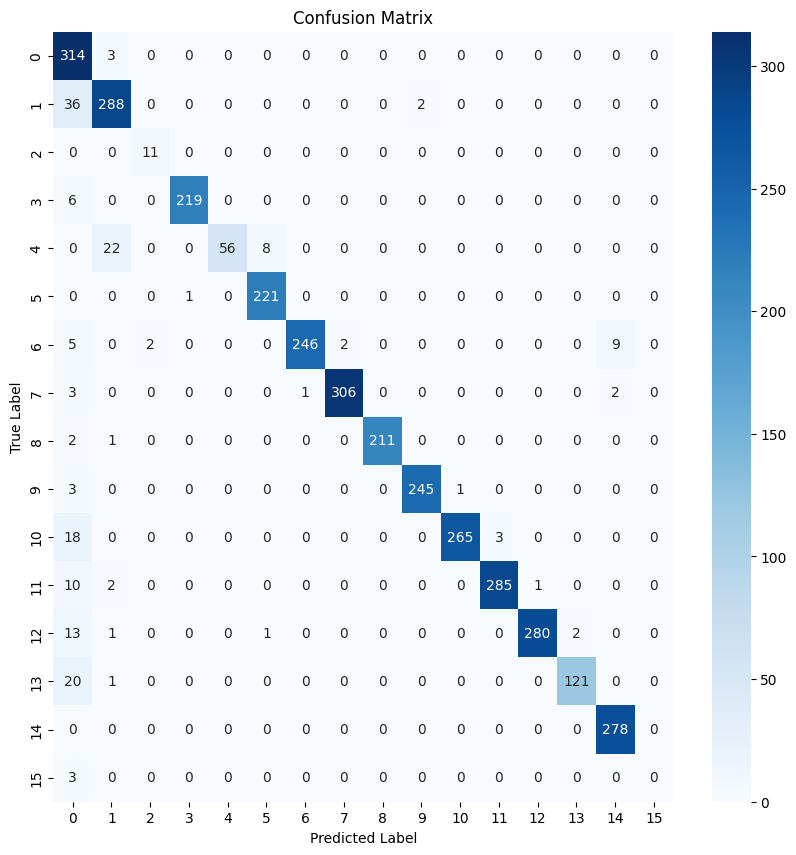

Accuracy:  0.9479
Precision: 0.9559
Recall:    0.9479
F1 Score:  0.9486


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
accuracy, precision, recall, f1 = evaluate_model_v2(net, valid_dataloader)


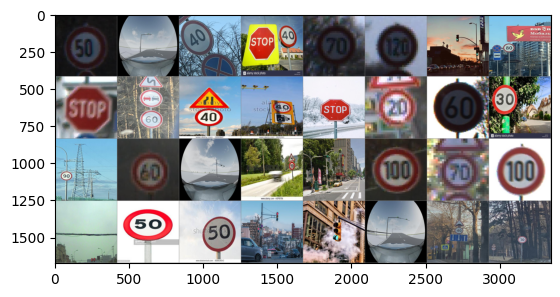

GroundTruth: Speed Limit 50  - Predicted: Speed Limit 120
GroundTruth: Green Light     - Predicted: Green Light
GroundTruth: Speed Limit 40  - Predicted: Speed Limit 80
GroundTruth: Speed Limit 40  - Predicted: Speed Limit 100
GroundTruth: Speed Limit 70  - Predicted: Speed Limit 70
GroundTruth: Speed Limit 120 - Predicted: Speed Limit 120
GroundTruth: Green Light     - Predicted: Stop
GroundTruth: Speed Limit 80  - Predicted: Speed Limit 80
GroundTruth: Stop            - Predicted: Stop
GroundTruth: Speed Limit 60  - Predicted: Green Light
GroundTruth: Speed Limit 40  - Predicted: Stop
GroundTruth: Speed Limit 40  - Predicted: Speed Limit 40
GroundTruth: Stop            - Predicted: Stop
GroundTruth: Speed Limit 20  - Predicted: Speed Limit 20
GroundTruth: Speed Limit 60  - Predicted: Speed Limit 60
GroundTruth: Speed Limit 30  - Predicted: Speed Limit 100
GroundTruth: Speed Limit 90  - Predicted: Speed Limit 100
GroundTruth: Speed Limit 60  - Predicted: Speed Limit 60
GroundTruth: Gr

In [16]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
images, labels = next(dataiter)


# Predictions of the model
outputs = net(images)  # Adding the channel dimension
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
for j in range(batch): 
    print(f"GroundTruth: {classes_list[labels[j]]:<15} - Predicted: {classes_list[predicted[j]]}")

# Train different model architectures: 

In [17]:
from ts_helper_functions import ts_net_dropout, ts_net_filter_norm, ts_pretrained_rsnet18

ts_net_dropout, ts_net_filter_norm, ts_pretrained_rsnet18 = ts_net_dropout(), ts_net_filter_norm(), ts_pretrained_rsnet18()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


In [18]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(ts_net_dropout.parameters(), lr=lr, momentum=momentum)

In [19]:
from ts_helper_functions import train 

model_directory = r"/kaggle/working/"
epochs = 20
model_name = "ts_net_dropout"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

ts_net_dropout_metrics_dict = train(ts_net_dropout, train_dataloader, test_dataloader, epochs, optimizer, criterion,
                                    model_directory=r".\nn", model_name=full_model_name, save_every_epoch=False)

Epoch 1/20 Train Loss: 2.732464 Train Acc: 0.089235: 100%|██████████| 111/111 [00:40<00:00,  2.77it/s]
Epoch 2/20 Train Loss: 2.650006 Train Acc: 0.098300: 100%|██████████| 111/111 [00:37<00:00,  2.98it/s]
Epoch 3/20 Train Loss: 2.566015 Train Acc: 0.144193: 100%|██████████| 111/111 [00:37<00:00,  2.99it/s]
Epoch 4/20 Train Loss: 2.446156 Train Acc: 0.200850: 100%|██████████| 111/111 [00:36<00:00,  3.07it/s]
Epoch 5/20 Train Loss: 2.319166 Train Acc: 0.241076: 100%|██████████| 111/111 [00:35<00:00,  3.09it/s]
Epoch 6/20 Train Loss: 2.223769 Train Acc: 0.271388: 100%|██████████| 111/111 [00:37<00:00,  2.98it/s]
Epoch 7/20 Train Loss: 2.156466 Train Acc: 0.281586: 100%|██████████| 111/111 [00:35<00:00,  3.11it/s]
Epoch 8/20 Train Loss: 2.070500 Train Acc: 0.313031: 100%|██████████| 111/111 [00:36<00:00,  3.06it/s]
Epoch 9/20 Train Loss: 2.016633 Train Acc: 0.321530: 100%|██████████| 111/111 [00:36<00:00,  3.00it/s]
Epoch 10/20 Train Loss: 1.952352 Train Acc: 0.342493: 100%|██████████| 11

Finished Training


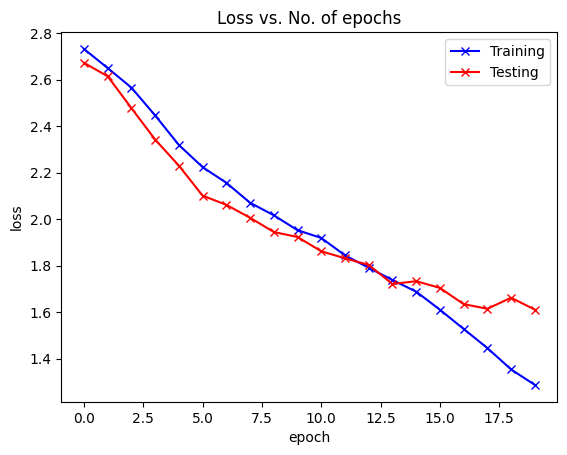

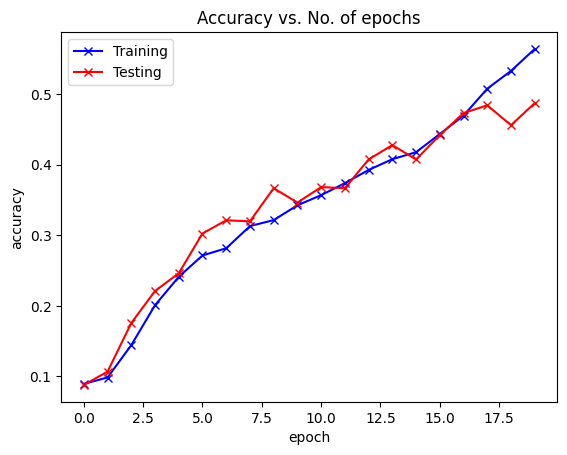

In [20]:
from ts_helper_functions import plot_accuracies, plot_losses

plot_losses(ts_net_dropout_metrics_dict["train_losses"],ts_net_dropout_metrics_dict["test_losses"])

plot_accuracies(ts_net_dropout_metrics_dict["train_accuracies"],ts_net_dropout_metrics_dict["test_accuracies"])

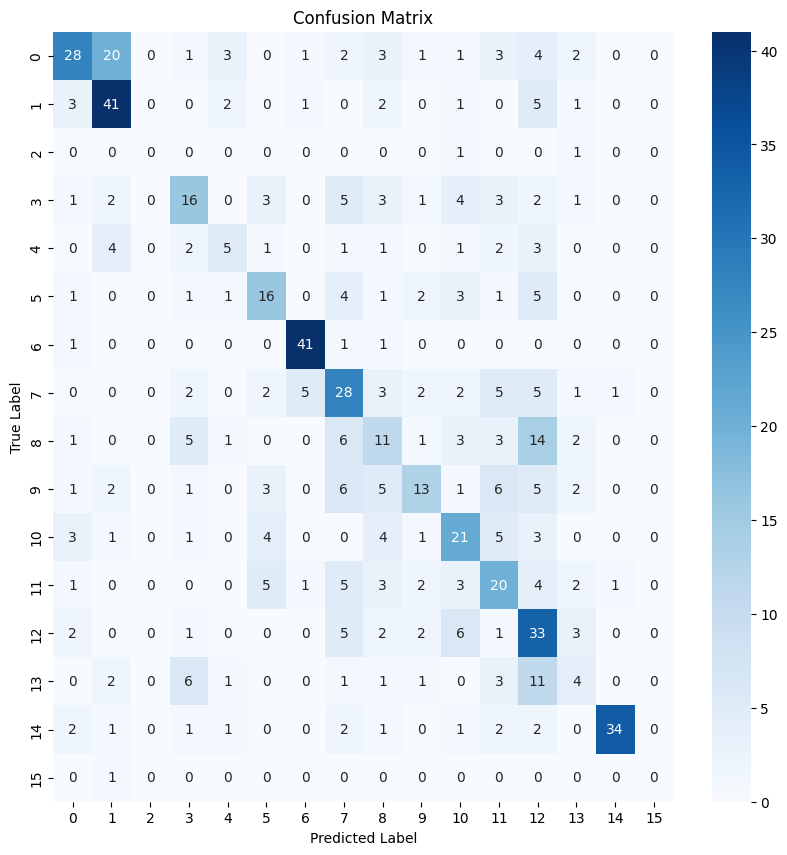

Accuracy:  0.4875
Precision: 0.4981
Recall:    0.4875
F1 Score:  0.4813


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Set device to CPU
ts_net_dropout.to("cpu")
dropout_accuracy, dropout_precision, dropout_recall, dropout_f1 = evaluate_model_v2(ts_net_dropout, test_dataloader)

In [22]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(ts_net_filter_norm.parameters(), lr=lr, momentum=momentum)

In [23]:
from ts_helper_functions import train 

model_directory = r"/kaggle/working/"
epochs = 20
model_name = "ts_net_filter_norm"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

ts_net_filter_norm_metrics_dict = train(ts_net_filter_norm, train_dataloader, test_dataloader, epochs, optimizer, criterion, 
                                        model_directory=r".\nn", model_name=full_model_name, save_every_epoch=False)

Epoch 1/20 Train Loss: 2.110758 Train Acc: 0.300567: 100%|██████████| 111/111 [00:46<00:00,  2.40it/s]
Epoch 2/20 Train Loss: 1.576595 Train Acc: 0.477054: 100%|██████████| 111/111 [00:47<00:00,  2.36it/s]
Epoch 3/20 Train Loss: 1.233290 Train Acc: 0.593768: 100%|██████████| 111/111 [00:46<00:00,  2.40it/s]
Epoch 4/20 Train Loss: 0.838664 Train Acc: 0.730595: 100%|██████████| 111/111 [00:46<00:00,  2.40it/s]
Epoch 5/20 Train Loss: 0.531052 Train Acc: 0.831728: 100%|██████████| 111/111 [00:44<00:00,  2.47it/s]
Epoch 6/20 Train Loss: 0.385366 Train Acc: 0.879603: 100%|██████████| 111/111 [00:46<00:00,  2.39it/s]
Epoch 7/20 Train Loss: 0.304216 Train Acc: 0.902266: 100%|██████████| 111/111 [00:49<00:00,  2.26it/s]
Epoch 8/20 Train Loss: 0.228316 Train Acc: 0.932861: 100%|██████████| 111/111 [00:46<00:00,  2.41it/s]
Epoch 9/20 Train Loss: 0.177489 Train Acc: 0.945609: 100%|██████████| 111/111 [00:45<00:00,  2.44it/s]
Epoch 10/20 Train Loss: 0.179389 Train Acc: 0.945042: 100%|██████████| 11

Finished Training


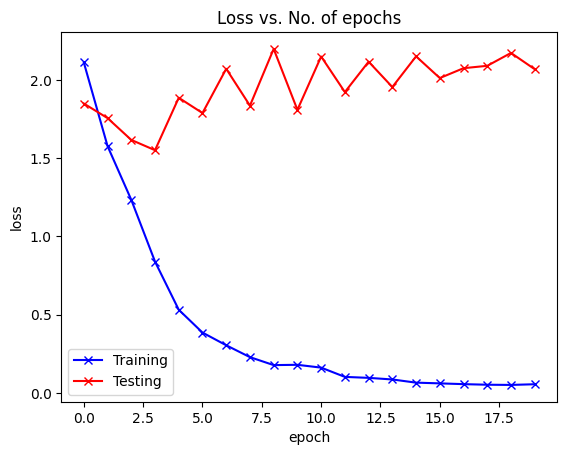

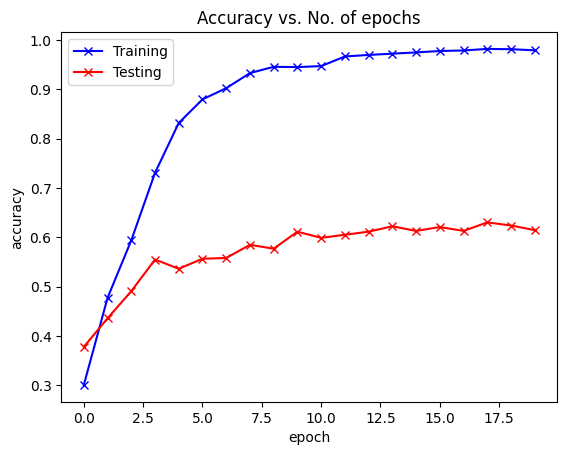

In [24]:
from ts_helper_functions import plot_accuracies, plot_losses

plot_losses(ts_net_filter_norm_metrics_dict["train_losses"],ts_net_filter_norm_metrics_dict["test_losses"])

plot_accuracies(ts_net_filter_norm_metrics_dict["train_accuracies"],ts_net_filter_norm_metrics_dict["test_accuracies"])

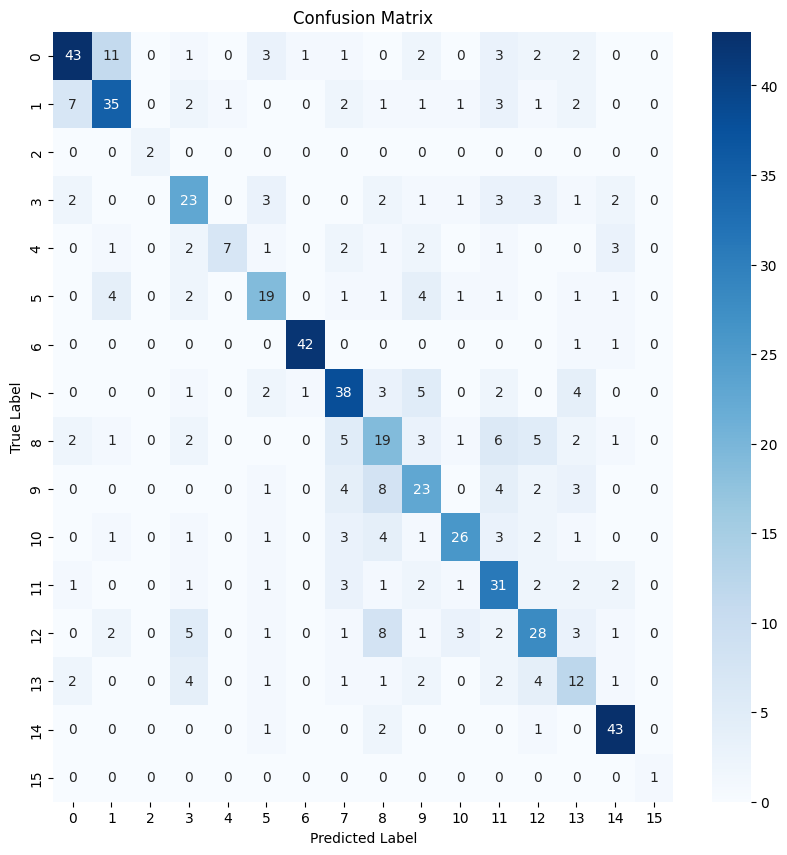

Accuracy:  0.6144
Precision: 0.6277
Recall:    0.6144
F1 Score:  0.6147


In [25]:
# Set device to CPU
ts_net_filter_norm.to("cpu")
filter_norm_accuracy, filter_norm_precision, filter_norm_recall, filter_norm_f1 = evaluate_model_v2(ts_net_filter_norm, test_dataloader)

In [26]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(ts_pretrained_rsnet18.parameters(), lr=lr, momentum=momentum)

In [27]:
from ts_helper_functions import train 

model_directory = r"/kaggle/working/"
epochs = 20
model_name = "ts_pretrained_rsnet18"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

ts_pretrained_rsnet18_metrics_dict = train(ts_pretrained_rsnet18, train_dataloader, test_dataloader, epochs, optimizer, criterion,
                                           model_directory=r".\nn", model_name=full_model_name, save_every_epoch=False)

Epoch 1/20 Train Loss: 2.203922 Train Acc: 0.278754: 100%|██████████| 111/111 [00:47<00:00,  2.36it/s]
Epoch 2/20 Train Loss: 1.613964 Train Acc: 0.484703: 100%|██████████| 111/111 [00:45<00:00,  2.42it/s]
Epoch 3/20 Train Loss: 1.297544 Train Acc: 0.607932: 100%|██████████| 111/111 [00:46<00:00,  2.40it/s]
Epoch 4/20 Train Loss: 0.997390 Train Acc: 0.716997: 100%|██████████| 111/111 [00:46<00:00,  2.40it/s]
Epoch 5/20 Train Loss: 0.737912 Train Acc: 0.812465: 100%|██████████| 111/111 [00:46<00:00,  2.40it/s]
Epoch 6/20 Train Loss: 0.537217 Train Acc: 0.873371: 100%|██████████| 111/111 [00:48<00:00,  2.31it/s]
Epoch 7/20 Train Loss: 0.395414 Train Acc: 0.915014: 100%|██████████| 111/111 [00:46<00:00,  2.38it/s]
Epoch 8/20 Train Loss: 0.290904 Train Acc: 0.944193: 100%|██████████| 111/111 [00:47<00:00,  2.34it/s]
Epoch 9/20 Train Loss: 0.223500 Train Acc: 0.956091: 100%|██████████| 111/111 [00:47<00:00,  2.33it/s]
Epoch 10/20 Train Loss: 0.171502 Train Acc: 0.970822: 100%|██████████| 11

Finished Training


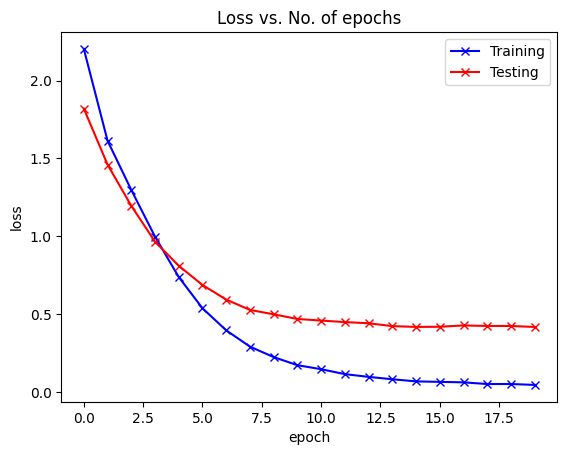

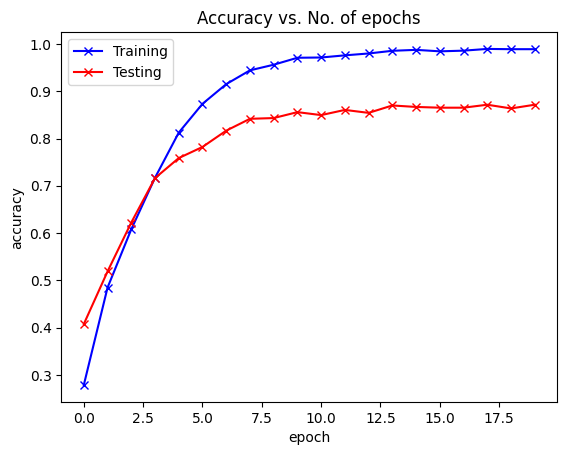

In [28]:
from ts_helper_functions import plot_accuracies, plot_losses

plot_losses(ts_pretrained_rsnet18_metrics_dict["train_losses"],ts_pretrained_rsnet18_metrics_dict["test_losses"])

plot_accuracies(ts_pretrained_rsnet18_metrics_dict["train_accuracies"],ts_pretrained_rsnet18_metrics_dict["test_accuracies"])

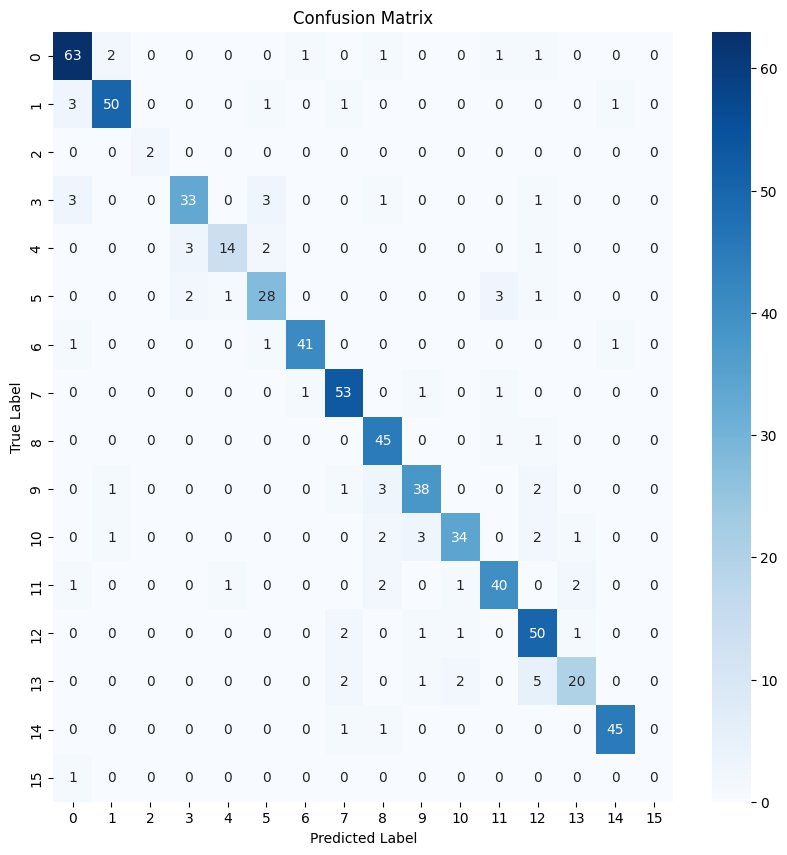

Accuracy:  0.8715
Precision: 0.8721
Recall:    0.8715
F1 Score:  0.8697


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Set device to CPU
ts_pretrained_rsnet18.to("cpu")
rsnet_accuracy, rsnet_precision, rsnet_recall, rsnet_f1 = evaluate_model_v2(ts_pretrained_rsnet18, test_dataloader)